<a href="https://colab.research.google.com/github/Darshu78/Darshu78/blob/main/CVAI_Q1067413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
# Set image size and batch size
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [5]:

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
# Training and validation data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset for Computer vision/chest_xray/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset for Computer vision/chest_xray/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


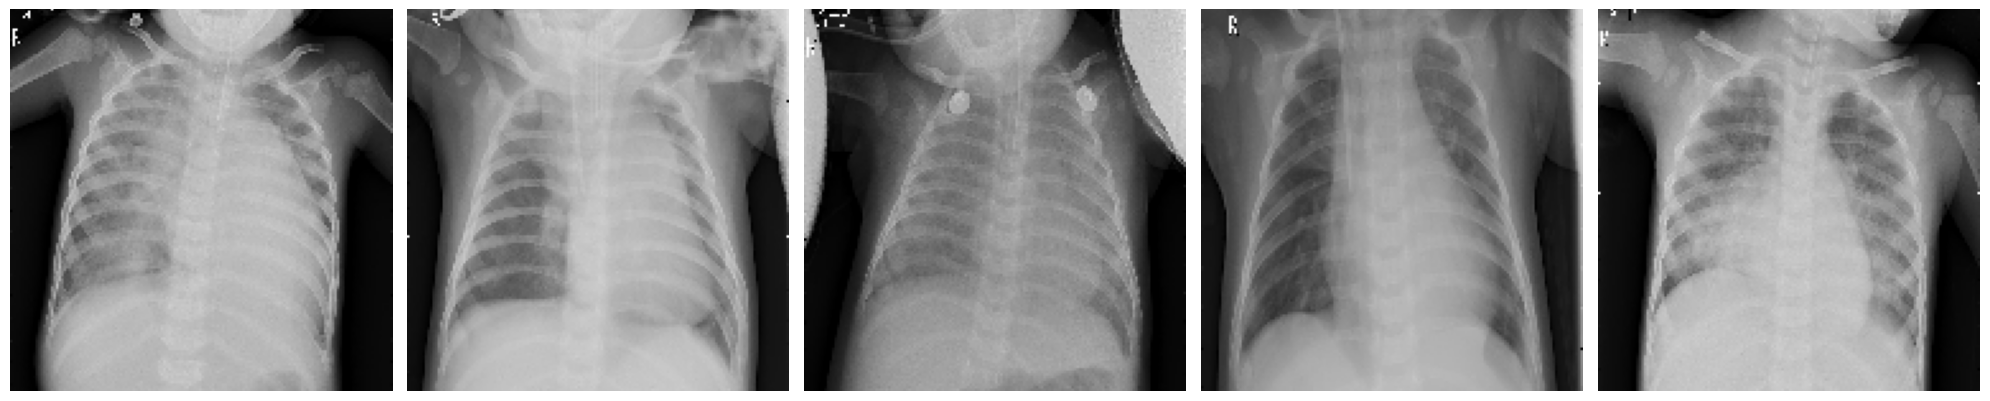

In [8]:
# Show sample images from the dataset
sample_training_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

In [9]:
# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: 1 (Pneumonia) or 0 (Normal)
])


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
# Model training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
131/131 [==============================] - 635s 4s/step - loss: 0.2924 - accuracy: 0.8833 - val_loss: 0.2196 - val_accuracy: 0.9175
Epoch 2/15
131/131 [==============================] - 311s 2s/step - loss: 0.1315 - accuracy: 0.9492 - val_loss: 0.1254 - val_accuracy: 0.9540
Epoch 3/15
131/131 [==============================] - 306s 2s/step - loss: 0.0991 - accuracy: 0.9641 - val_loss: 0.1312 - val_accuracy: 0.9597
Epoch 4/15
131/131 [==============================] - 309s 2s/step - loss: 0.0743 - accuracy: 0.9746 - val_loss: 0.1197 - val_accuracy: 0.9588
Epoch 5/15
131/131 [==============================] - 310s 2s/step - loss: 0.0564 - accuracy: 0.9796 - val_loss: 0.1093 - val_accuracy: 0.9684
Epoch 6/15
131/131 [==============================] - 322s 2s/step - loss: 0.0586 - accuracy: 0.9794 - val_loss: 0.1531 - val_accuracy: 0.9521
Epoch 7/15
131/131 [==============================] - 304s 2s/step - loss: 0.0734 - accuracy: 0.9717 - val_loss: 0.1166 - val_accuracy: 0.9664

In [13]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset for Computer vision/chest_xray/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [14]:
# Model evaluation on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


20/20 [==============================] - 103s 5s/step - loss: 1.2638 - accuracy: 0.7644
Test Accuracy: 0.7644230723381042


In [15]:
# Training and validation metrics visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

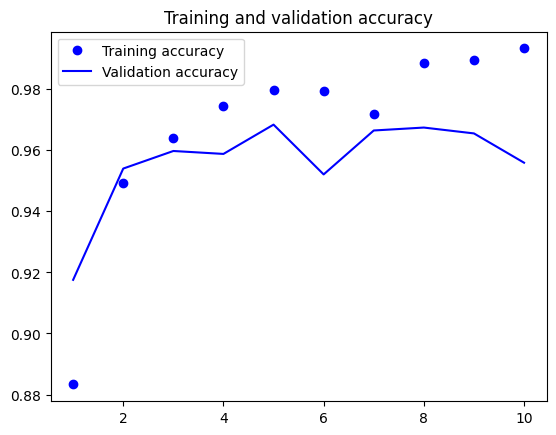

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

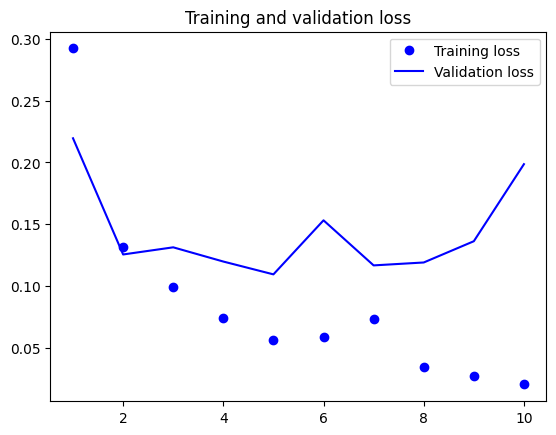

In [17]:
# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()